In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#FPH

fph_matched_users = pd.read_csv('/nethome/asrinivasan45/matched_users.csv')
fph_matched_users.columns = ['treatment_id', 'control_id']

fph_matched_data = pd.read_csv('/nethome/asrinivasan45/matched_all_data.csv')
fph_matched_data.columns = ['id', 'author', 'preban', 'treatment', 'distance', 'weights']

fph_treatment = fph_matched_users.set_index('treatment_id').join(fph_matched_data.set_index('id'))
fph_treatment = fph_treatment[['author', 'preban']]
fph_treatment['id'] = range(len(fph_treatment))
fph_treatment = fph_treatment.set_index('id')

fph_control = fph_matched_users.set_index('control_id').join(fph_matched_data.set_index('id'))
fph_control = fph_control[['author', 'preban']]
fph_control['id'] = range(len(fph_control))
fph_control = fph_control.set_index('id')

#CT

ct_matched_users = pd.read_csv('/nethome/asrinivasan45/ct_matched_users.csv')
ct_matched_users.columns = ['treatment_id', 'control_id']

ct_matched_data = pd.read_csv('/nethome/asrinivasan45/ct_matched_all_data.csv')
ct_matched_data.columns = ['id', 'author', 'preban', 'treatment', 'distance', 'weights']

ct_treatment = ct_matched_users.set_index('treatment_id').join(ct_matched_data.set_index('id'))
ct_treatment = ct_treatment[['author', 'preban']]
ct_treatment['id'] = range(len(ct_treatment))
ct_treatment = ct_treatment.set_index('id')

ct_control = ct_matched_users.set_index('control_id').join(ct_matched_data.set_index('id'))
ct_control = ct_control[['author', 'preban']]
ct_control['id'] = range(len(ct_control))
ct_control = ct_control.set_index('id')

print ct_control.tail()
print ct_treatment.tail()

             author  preban
id                         
3338   Wannabe2good      34
3339          aazav      23
3340      anisaerah      29
3341  Mari_Yanagawa      53
3342  Kim_Jong_Goon      22

[5 rows x 2 columns]
          author  preban
id                      
3338      zeperf     600
3339      zilla2      80
3340  zionvinman     264
3341     zundish     924
3342    zurgling      68

[5 rows x 2 columns]


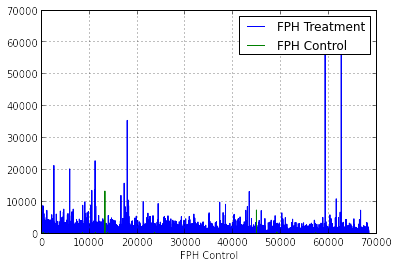

Mean Difference for FPH :  231.446057484
Median Difference for FPH :  64.0


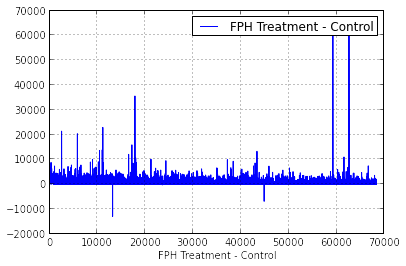

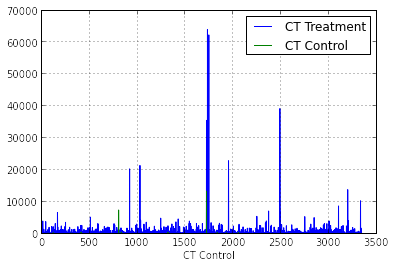

Mean Difference for CT :  385.860005983
Median Difference for CT :  81.0


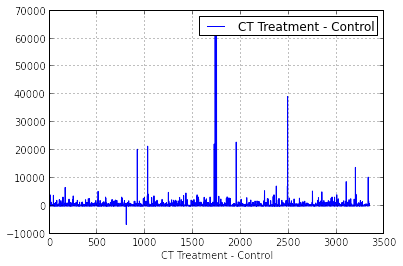

In [69]:
def compare_match(treatment, control, data=''):
    ax = treatment.plot(y='preban', label=data + ' Treatment')
    control.plot(ax=ax, y='preban', label=data+' Control')
    plt.legend()
    plt.show()
    
def plot_diff(treatment, control, data=''):
    diff = pd.DataFrame(treatment['preban'] - control['preban'])
    diff.plot(y='preban', label=data+' Treatment - Control')
    print "Mean Difference for "+data+" : ", diff['preban'].mean()
    print "Median Difference for "+data+" : ", diff['preban'].median()
    plt.legend()
    plt.show()
    
compare_match(fph_treatment, fph_control, 'FPH')
plot_diff(fph_treatment, fph_control, 'FPH')

compare_match(ct_treatment, ct_control, 'CT')
plot_diff(ct_treatment, ct_control, 'CT')


# print fph_matched_users.head()

Percentage of FPH Treatment tail users ( < 5) 0.116782766493
Percentage of FPH Control tail users ( < 5) 0.366636422174

Percentage of CT Treatment tail users ( < 5) 0.0487586000598
Percentage of CT Control tail users ( < 5) 0.0487586000598
Mean Difference for  :  0.0
Median Difference for  :  0.0


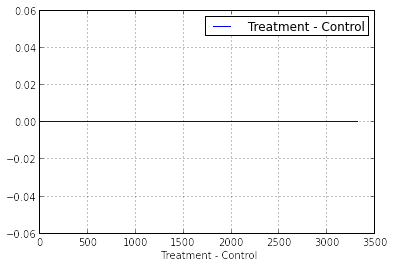

In [87]:
def tail_users(treatment, control, data=''):
    print "Percentage of "+data+" Treatment tail users ( < 5)", len(treatment[treatment['preban'] <= 5]) / float(len(treatment))
    print "Percentage of "+data+" Control tail users ( < 5)", len(control[control['preban'] <= 5]) / float(len(control))
#     print len(treatment[treatment['preban'] <= 5]), float(len(treatment))
#     print len(control[control['preban'] <= 5]), float(len(control))
#     print control[control['preban'] <= 5]
#     print treatment[treatment['preban'] <= 5]
    
tail_users(fph_treatment, fph_control, data='FPH')
print
tail_users(ct_treatment, ct_control, data='CT')

# plot_diff(fph_treatment[fph_treatment['preban'] <= 5], fph_control[fph_control['preban'] <= 5])
plot_diff(ct_treatment[ct_treatment['preban'] <= 5], ct_control[ct_control['preban'] <= 5])



In [100]:
psm_data = pd.read_csv('/nethome/asrinivasan45/psm_data.csv')

print psm_data[psm_data['author'] == 'leelem0n']

treatment_data = pd.read_csv('/nethome/eshwar3/reddit-hate/results/fph/treatment-fph-preban-monthly-2015.csv')

# print treatment_data
print treatment_data[treatment_data['user'] == 'leelem0n']['total_posts'].sum()

        Unnamed: 0    author  preban  treatment
0                0  leelem0n    5923          1
555691      487359  leelem0n       7          0

[2 rows x 4 columns]
5923.0


In [106]:
psm_data = pd.read_csv('/nethome/asrinivasan45/psm_data.csv')

print psm_data[psm_data['author'] == 'TweetPoster']

control_data = pd.read_csv('/nethome/eshwar3/reddit-hate/results/fph/control-fph-preban-monthly-2015.csv')

# print treatment_data
print control_data[control_data['user'] == 'TweetPoster']
print control_data[control_data['user'] == 'TweetPoster']['total_posts'].sum()

        Unnamed: 0       author  preban  treatment
373085      304753  TweetPoster     478          0

[1 rows x 4 columns]
        day  hate_speech  total_posts         user
141366    0          310        13110  TweetPoster
141367  -30          451        18694  TweetPoster
141368  -60          405        20189  TweetPoster
141369  -90          315        15378  TweetPoster
141370 -120          372        16075  TweetPoster
141371 -150           15          465  TweetPoster

[6 rows x 4 columns]
83911.0


In [ ]:
import json
